# IMDb Movies
This notebook analyses a subset of 5,043 IMDb movies

In [1]:
# Check Python version for compatibility/reference
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/Users/waynelambert/Dropbox/Programming/Dev/code_libraries/python/src/.venv/bin/python3.8
3.8.3 (default, Jul  4 2020, 20:21:02) 
[Clang 11.0.0 (clang-1100.0.33.8)]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


In [2]:
# Import requisite data science libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datapane as dp

In [3]:
# Check Package version numbering for compatibility/reference
print(f"{'Pandas version:'} \t{pd.__version__}")
print(f"{'NumPy version:'} \t\t{np.__version__}")
print(f"{'Matplotlib version:'} \t{mpl.__version__}")
print(f"{'Seaborn version:'} \t{sns.__version__}")


Pandas version: 	1.0.5
NumPy version: 		1.19.1
Matplotlib version: 	3.3.0
Seaborn version: 	0.10.1


In [4]:
# Set up pandas, matplotlib and seaborn
pd.options.display.max_rows = 100
# %matplotlib inline
sns.set_style('darkgrid')

In [5]:
# Read the movies data in from an Excel file using tab as the delimiter
df = pd.read_csv('imdb_movies.csv', encoding='utf-8', sep='\t')

In [6]:
# Preview the content of the dataframe
df.head()

,num_recs,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,...,imdb_score,language,movie_facebook_likes,movie_imdb_link,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
0,1,1000.0,CCH Pounder,936.0,Joel David Moore,855.0,Wes Studi,1.78,237000000.0,4834,...,7.9,English,33000,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,AvatarÂ,723.0,3054.0,886204,avatar|future|marine|native|paraplegic,2009.0
1,1,40000.0,Johnny Depp,5000.0,Orlando Bloom,1000.0,Jack Davenport,2.35,300000000.0,48350,...,7.1,English,0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Pirates of the Caribbean: At World's EndÂ,302.0,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,2007.0
2,1,11000.0,Christoph Waltz,393.0,Rory Kinnear,161.0,Stephanie Sigman,2.35,245000000.0,11700,...,6.8,English,85000,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,SpectreÂ,602.0,994.0,275868,bomb|espionage|sequel|spy|terrorist,2015.0
3,1,27000.0,Tom Hardy,23000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,2.35,250000000.0,106759,...,8.5,English,164000,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,The Dark Knight RisesÂ,813.0,2701.0,1144337,deception|imprisonment|lawlessness|police offi...,2012.0
4,1,131.0,Doug Walker,12.0,Rob Walker,NaN,NaN,NaN,NaN,143,...,7.1,NaN,0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,Star Wars: Episode VII - The Force AwakensÂ ...,NaN,NaN,8,NaN,NaN


## Data Analysis
Let's understand the data more by doing some provisional analysis.

In [7]:
# Check the data columns, datatypes and indication of column's data presence/absence
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_recs                   5043 non-null   int64  
 1   actor_1_facebook_likes     5036 non-null   float64
 2   actor_1_name               5036 non-null   object 
 3   actor_2_facebook_likes     5030 non-null   float64
 4   actor_2_name               5030 non-null   object 
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_3_name               5020 non-null   object 
 7   aspect_ratio               4714 non-null   float64
 8   budget                     4551 non-null   float64
 9   cast_total_facebook_likes  5043 non-null   int64  
 10  color                      5024 non-null   object 
 11  content_rating             4740 non-null   object 
 12  country                    5038 non-null   object 
 13  director_facebook_likes    4939 non-null   float

In [8]:
""" To get a sense of the data, retrieve aggregate values for numeric data fields.
    Of course, some of them make no actual sense! """
df.describe(include=[np.number])

,num_recs,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
count,5043.0,5036.000000,5030.000000,5020.000000,4714.000000,4.551000e+03,5043.000000,4939.000000,5028.000000,5030.000000,4.159000e+03,5043.000000,5043.000000,4993.000000,5022.000000,5.043000e+03,4935.000000
mean,1.0,6560.047061,1651.754473,645.009761,2.220403,3.975262e+07,9699.063851,686.509212,107.201074,1.371173,4.846841e+07,6.442138,7525.964505,140.194272,272.770808,8.366816e+04,2002.470517
std,0.0,15020.759120,4042.438863,1665.041728,1.385113,2.061149e+08,18163.799124,2813.328607,25.197441,2.013576,6.845299e+07,1.125116,19320.445110,121.601675,377.982886,1.384853e+05,12.474599
min,1.0,0.000000,0.000000,0.000000,1.180000,2.180000e+02,0.000000,0.000000,7.000000,0.000000,1.620000e+02,1.600000,0.000000,1.000000,1.000000,5.000000e+00,1916.000000
25%,1.0,614.000000,281.000000,133.000000,1.850000,6.000000e+06,1411.000000,7.000000,93.000000,0.000000,5.340988e+06,5.800000,0.000000,50.000000,65.000000,8.593500e+03,1999.000000
50%,1.0,988.000000,595.000000,371.500000,2.350000,2.000000e+07,3090.000000,49.000000,103.000000,1.000000,2.551750e+07,6.600000,166.000000,110.000000,156.000000,3.435900e+04,2005.000000
75%,1.0,11000.000000,918.000000,636.000000,2.350000,4.500000e+07,13756.500000,194.500000,118.000000,2.000000,6.230944e+07,7.200000,3000.000000,195.000000,326.000000,9.630900e+04,2011.000000
max,1.0,640000.000000,137000.000000,23000.000000,16.000000,1.221550e+10,656730.000000,23000.000000,511.000000,43.000000,7.605058e+08,9.500000,349000.000000,813.000000,5060.000000,1.689764e+06,2016.000000


In [9]:
# Get number of unique movies
num_movies = df['movie_title'].nunique()
f"{'Number of Movies:'} {num_movies:,.0f}"

'Number of Movies: 4,917'

In [10]:
# Get number of duplicated movie titles based upon the movie title alone
duplicated_movie_titles = df.duplicated(subset='movie_title', keep=False)
f"{'Number of Affected Records with Duplicated Movie Titles:'} {sum(duplicated_movie_titles):,.0f}"

'Number of Affected Records with Duplicated Movie Titles: 245'

In [11]:
# Get number of duplicates based on both movie title and number of users that voted
duplicated_movie_titles = df.duplicated(subset=['movie_title', 'num_voted_users'], keep=False)
f"{'Number of Partial Duplicates:'} {sum(duplicated_movie_titles):,.0f}"

'Number of Partial Duplicates: 94'

In [12]:
# Get number of unique directors
num_directors = df['director_name'].nunique()
f"{'Number of Directors:'} {num_directors:,.0f}"

'Number of Directors: 2,398'

In [13]:
# Get oldest and newest movies
earliest_year = df['title_year'].min()
latest_year = df['title_year'].max()
f"{'Earliest Year:'} {int(earliest_year)} | {'Latest Year:'} {int(latest_year)}"

'Earliest Year: 1916 | Latest Year: 2016'

In [14]:
# Get lowest and highest grossing movies
lowest_revenue = df['gross'].min()
highest_revenue = df['gross'].max()
f"{'Lowest Revenue:'} {lowest_revenue:,.0f} | {'Highest Revenue:'} {highest_revenue:,.0f}"

'Lowest Revenue: 162 | Highest Revenue: 760,505,847'

In [15]:
# Get lowest and highest budget movies
lowest_budget = df['budget'].min()
highest_budget = df['budget'].max()
f"{'Lowest Budget:'} {lowest_budget:,.0f} | {'Highest Budget:'} {highest_budget:,.0f}"

'Lowest Budget: 218 | Highest Budget: 12,215,500,000'

In [16]:
ctry_grp = df.groupby(['country'])

In [17]:
ctry_grp['imdb_score'].mean().head(df['country'].nunique())

country
Afghanistan             7.400000
Argentina               7.500000
Aruba                   4.800000
Australia               6.514545
Bahamas                 4.400000
Belgium                 5.600000
Brazil                  7.275000
Bulgaria                6.100000
Cambodia                5.600000
Cameroon                7.500000
Canada                  6.161905
Chile                   6.900000
China                   6.623333
Colombia                7.500000
Czech Republic          6.966667
Denmark                 7.172727
Dominican Republic      6.900000
Egypt                   8.100000
Finland                 7.200000
France                  6.678571
Georgia                 5.600000
Germany                 6.340206
Greece                  7.000000
Hong Kong               6.741176
Hungary                 6.450000
Iceland                 7.333333
India                   6.532353
Indonesia               7.600000
Iran                    7.725000
Ireland                 6.783333
Is

In [18]:
# Get the number of records by country
ctry_grp['num_recs'].value_counts().head(df['country'].nunique())

country               num_recs
Afghanistan           1              1
Argentina             1              4
Aruba                 1              1
Australia             1             55
Bahamas               1              1
Belgium               1              4
Brazil                1              8
Bulgaria              1              1
Cambodia              1              1
Cameroon              1              1
Canada                1            126
Chile                 1              1
China                 1             30
Colombia              1              1
Czech Republic        1              3
Denmark               1             11
Dominican Republic    1              1
Egypt                 1              1
Finland               1              1
France                1            154
Georgia               1              1
Germany               1             97
Greece                1              2
Hong Kong             1             17
Hungary               1          

### Movies - by Genre

This is a tricky metric to achieve with the datset since the 'genres' field contains multiple genres. This means that the field needs to be split on the pipe delimiter and will mean that the relationship between movies and genres are one-to-many.

A movie can be listed in many genres, therefore the sum of the genres exceeds the total number of records within the dataset.

In [19]:
# Check the 'genres' field to illustrate the issue
df['genres'].head(10)

0                      Action|Adventure|Fantasy|Sci-Fi
1                             Action|Adventure|Fantasy
2                            Action|Adventure|Thriller
3                                      Action|Thriller
4                                          Documentary
5                              Action|Adventure|Sci-Fi
6                             Action|Adventure|Romance
7    Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                              Action|Adventure|Sci-Fi
9                     Adventure|Family|Fantasy|Mystery
Name: genres, dtype: object

In [20]:
# Create Python list of multiple genres from the 'genres' field of the dataframe
row_genres = list(df['genres'])

In [21]:
# Compile a sorted distinct list of dataset genres and their appearance counts

from collections import defaultdict, OrderedDict

genre_counts = defaultdict(int)
for row_genre in row_genres:
    genres = row_genre.split('|')
    for genre in genres:
        genre_counts[genre] += 1

genre_counts = dict(sorted(genre_counts.items(), key=lambda t: t[1], reverse=True))

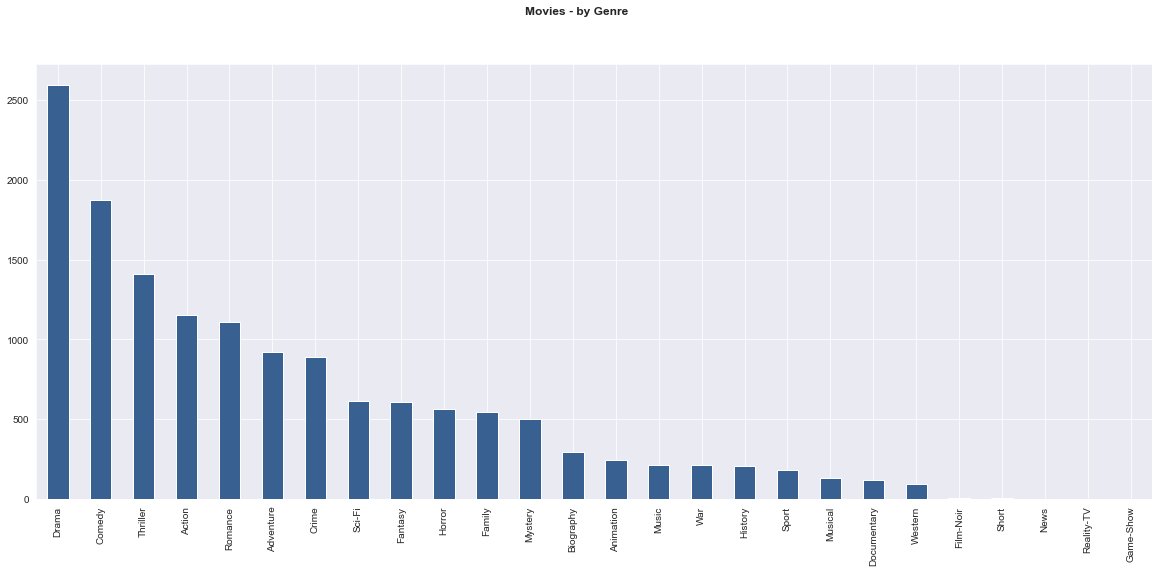

In [22]:
# Plot a bar chart of the number of movies by genre
pd.DataFrame(genre_counts, index=['genres']).T.plot(kind='bar',
                                                    legend=None,
                                                    color='#386191',
                                                    figsize=(20, 8))
plt.suptitle('Movies - by Genre', fontsize=12, fontweight='bold')
plt.show()

In [23]:
# Get a new dataframe containing only the english speaking country's data
eng_countries = ['New Zealand', 'UK', 'Australia', 'USA', 'Canada']
df_english = df[(df['country'].isin(eng_countries))]

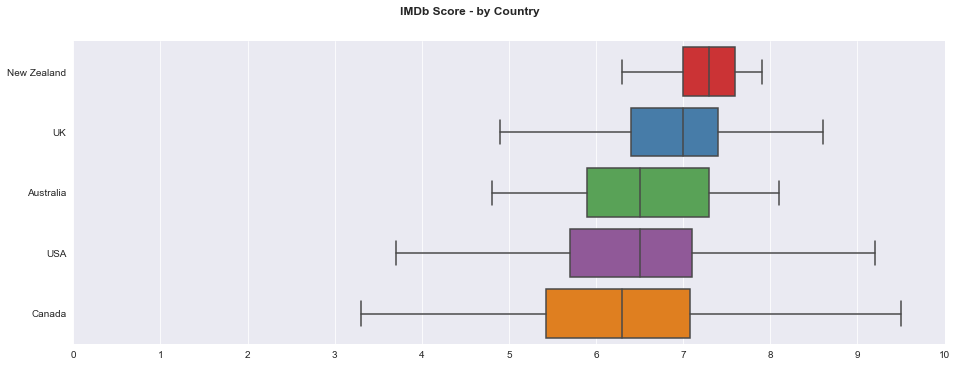

In [24]:
# Set up the box plot with the required logical ordering, size and removal of outliers
imdb_by_ctry = sns.catplot(x='imdb_score',
                           y='country',
                           data=df_english,
                           kind='box',
                           showfliers=False,
                           height=6,
                           aspect=18/8,
                           palette='Set1',
                           order=eng_countries)

# Adjust spacing and set the chart and axe's titles
imdb_by_ctry.fig.subplots_adjust(top=0.9, bottom=0.2)
imdb_by_ctry.fig.suptitle('IMDb Score - by Country', fontsize=12, fontweight='bold')
imdb_by_ctry.set(xlabel='', ylabel='')
plt.xticks([num for num in range(0, 11)])
plt.show()

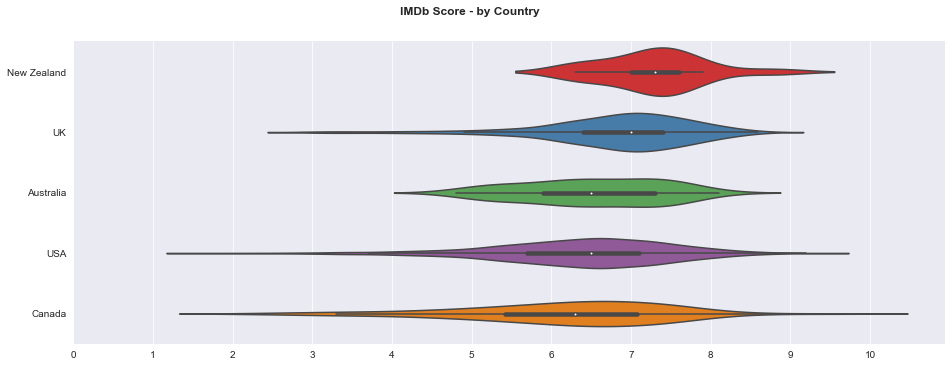

In [25]:
# Set up the violin plot with the required logical ordering, size and inclusion of outliers
imdb_by_ctry = sns.catplot(x='imdb_score',
                           y='country',
                           data=df_english,
                           kind='violin',
                           showfliers=True,
                           height=6,
                           aspect=18/8,
                           palette='Set1',
                           order=eng_countries)

# Adjust spacing and set the chart and axe's titles
imdb_by_ctry.fig.subplots_adjust(top=0.9, bottom=0.2)
imdb_by_ctry.fig.suptitle('IMDb Score - by Country', fontsize=12, fontweight='bold')
imdb_by_ctry.set(xlabel='', ylabel='')
plt.xticks([num for num in range(0, 11)])
plt.show()

## Questions

### Q1: Budget of the 53rd Highest Grossing Movie

##### Pandas Answer

In [26]:
q1 = df.groupby(by=['movie_title', 'gross', 'budget'])['movie_title'].describe()[['count']]
q1 = q1.sort_values(by=['gross'], ascending=False)
q1[52:53]  # Index 52 is item 53 as zero based indexing

,,,count
movie_title,gross,budget,
Independence DayÂ,306124059.0,75000000.0,1


##### SQL Answer
```sql
SELECT movie_title, max(gross), max(budget)
FROM cases.movie_metadata
WHERE gross IS NOT NULL
GROUP BY movie_title
ORDER BY max(gross) DESC LIMIT 1 OFFSET 52;
```

### Q2: Movies Made in 1975 and their Countries of Origin

##### Pandas Answer

In [27]:
df.query('title_year==1975').filter(items=['country', 'movie_title']).sort_values(by=['country'])

,country,movie_title
3051,UK,Barry LyndonÂ
3710,UK,The Return of the Pink PantherÂ
4796,UK,Monty Python and the Holy GrailÂ
2920,USA,JawsÂ
3869,USA,One Flew Over the Cuckoo's NestÂ
4845,USA,Death Race 2000Â


##### SQL Answer
```sql
SELECT country, movie_title
FROM cases.movie_metadata
WHERE title_year=1975
ORDER BY country ASC;
```


### Q3: Average Duration of R Rated Movies in 2013

##### Pandas Answer

In [28]:
df.query('title_year==2013 & content_rating=="R"')['duration'].mean()

107.64583333333333

##### SQL Answer
```sql
SELECT avg(duration)
FROM cases.movie_metadata
WHERE title_year=2013 AND content_rating='R';
```

### Q4: Correlation Analysis for Num of Faces on Poster v IMDb Score

##### Pandas/Seaborn Answer

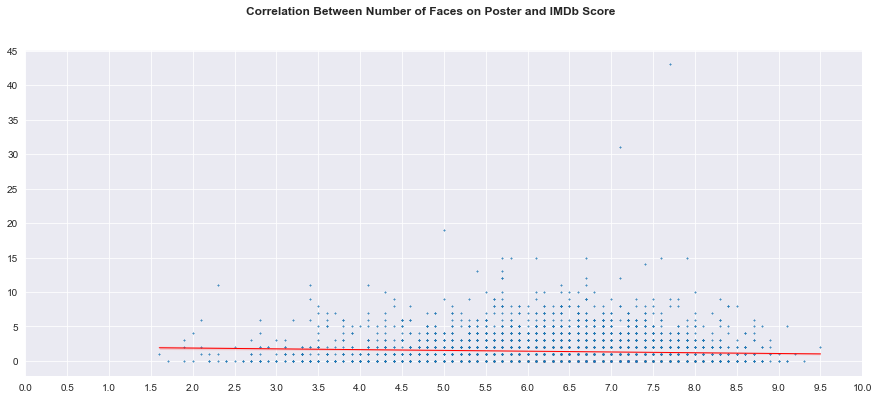

In [29]:
plt.subplots(figsize=(15, 6))
fig = sns.regplot(x='imdb_score',
                 y='facenumber_in_poster',
                 data=df,
                 marker='x',
                 line_kws={'lw':1, 'color': "red"},
                 scatter_kws={'s':1})
plt.suptitle(t='Correlation Between Number of Faces on Poster and IMDb Score',
             fontsize=12,
             fontweight='bold')
fig.set(xlabel='', ylabel='')
plt.xticks([num/2 for num in range(0, 21)])
plt.yticks([num for num in range(0, 46, 5)])
plt.show()

As demonstrated in the above scatterchart, there is no correlation between the IMDb Score and the number of faces on the movie poster.

Interestingly, the trendline displayed is slightly different to the one represented in Tableau. I cannot find any particular reason why this might be so I wonder if there is a slight difference in the algorithm which calculates trendlines between Tableau and Matplotlib.

### Q5: Actor with Highest Average IMDb Score
<sup>* only for actors with >=5 movies as actor 1</sup>


##### Pandas Answer

In [30]:
grps = df.groupby(by=['actor_1_name'])['imdb_score'].describe()[['count', 'mean']]
grps.reset_index()
grps = grps.groupby(by=['actor_1_name']).filter(lambda x: x['count'] >= 5)
grps = grps.sort_values(by=['mean'], ascending=False)
grps = grps.rename({'count': 'Count', 'mean': 'Mean'}, axis=1)
grps.head(10)

,Count,Mean
actor_1_name,,
Leonardo DiCaprio,21.0,7.495238
Roy Scheider,6.0,7.466667
Tom Hanks,24.0,7.425000
Quentin Tarantino,5.0,7.420000
Clint Eastwood,16.0,7.337500
Madeline Kahn,6.0,7.333333
Tom Hardy,11.0,7.309091
James Mason,5.0,7.300000
Alan Rickman,8.0,7.287500


##### SQL Answer
```sql
SELECT actor_1_name, count(actor_1_name), avg(imdb_score)
FROM cases.movie_metadata
GROUP BY actor_1_name
HAVING count(actor_1_name) >=5
ORDER BY avg(imdb_score) DESC;
```